### Learning outcomes: ###

- Identify the different components of a quantum circuit (qubits, gates, and measurements).
- Translate between sequences of instructions and a quantum circuit.
- Define and calculate the depth of a quantum circuit.




### Wires and Registers ###

number of **wires** notes the amount of qubits in a circuit

group of qubits is called a **quantum register**

*if the initial state is not given, you can assume it is state $|0 \rangle$*

*reminder* $|0 \rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix} \;$

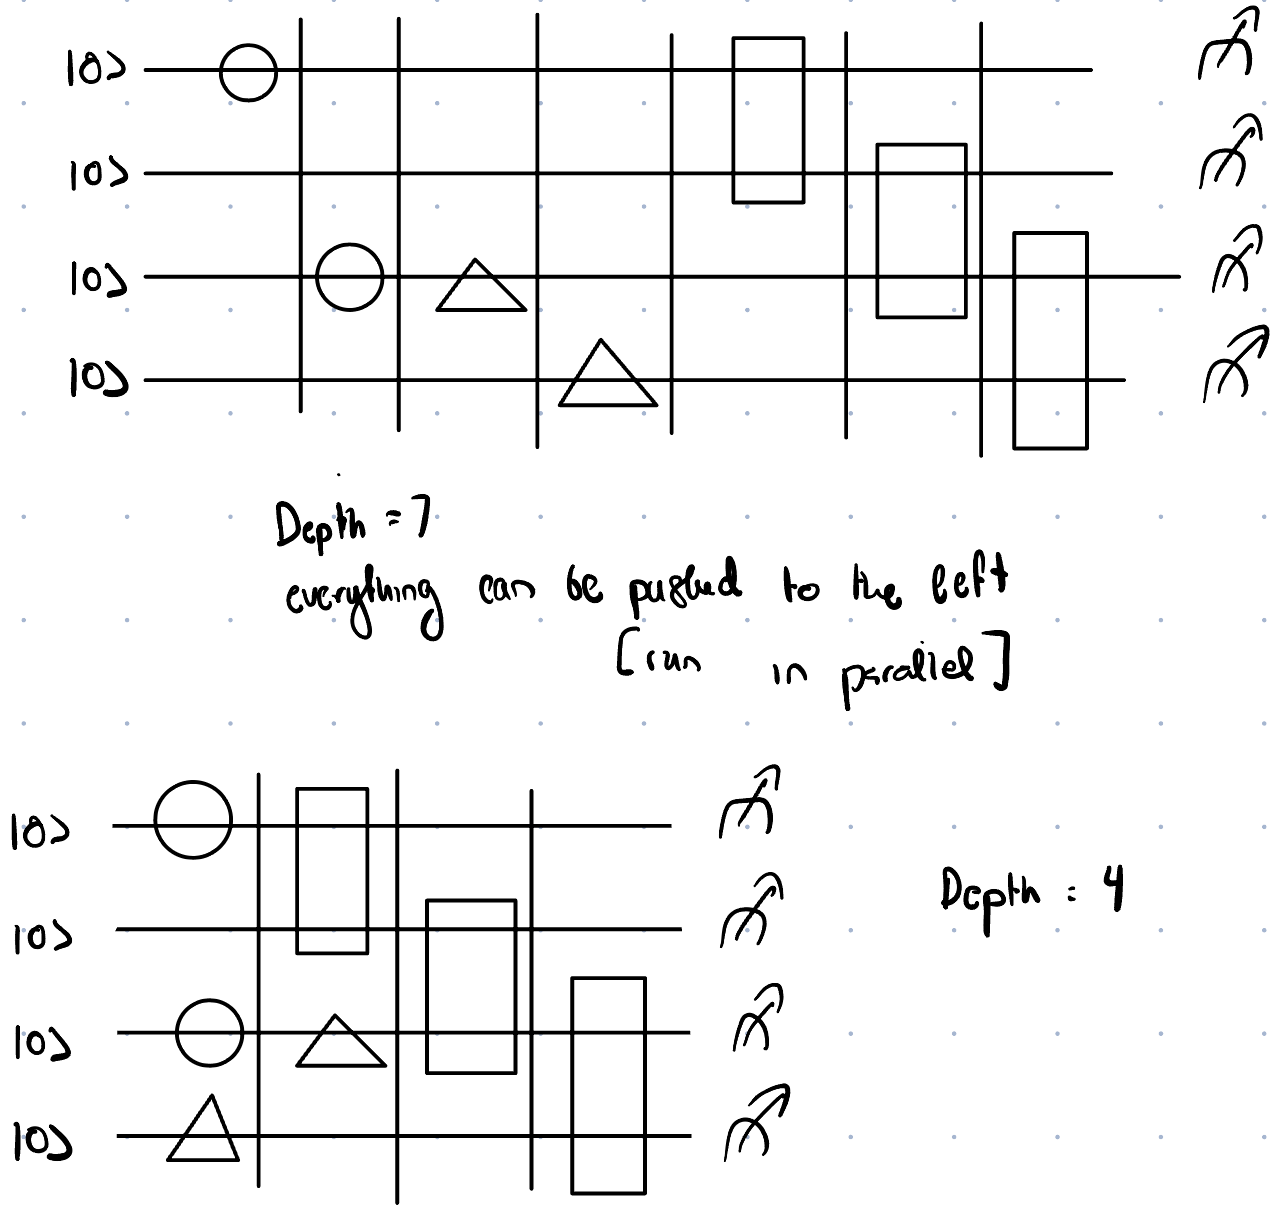

### PennyLane

**PennyLane** is used to implement quantum algorthims

quantum circuits are represented as **quantum functions**

In [1]:
### codercise 1.2.1

import pennylane as qml

def my_circuit(theta, phi): 
    
    #first depth
    qml.CNOT(wires=[0, 1])
    qml.RX(theta, wires=2)
    
    #second depth
    qml.Hadamard(wires=0)
    
    #third depth
    qml.CNOT(wires=[2, 0]) # is this two to zero or two and zero? If two any zero the depth could be more compact?

    #fourth depth    
    qml.RY(phi, wires=1)
    
    return qml.probs(wires=[0, 1, 2])


### Running a Quantum Circuit (Quantum Function) ###

- we need a device to run the circuit on

    `dev = qml.device('device.name', wires=num_qubits)`
    
    textbook will use the `default.qubit` device (standard quantum simulator)
    
    `dev = qml.device('default.qubit', wires=["wire_a", "wire_b"])` you can pass a number or a list of strings for wires 
    <br> <br>
- we need a QNode, which binds the circuit to the device, and executes it. Two ways to do it 


    - we can use the `qml.QNode` method:
    
        `my_qnode = qml.QNode(my_circuit, dev)` this variable can be called as a function with the same parameters as `my_circuit` <br> <br>
        
        
    - we can use a decorator `@qml.qnode(dev)` this will produce a QNode with the same name as the function that can be run on the device `dev`
    

both examples can be seen below


In [2]:
#### codercise 1.2.2

# This creates a device with three wires on which PennyLane can run computations
dev = qml.device("default.qubit", wires=3) # standard quantum simulator


#this is our circuit or quantum function
def my_circuit(theta, phi, omega):
    
    #depth 1
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    
    #depth 2
    qml.CNOT(wires=[0, 1])
    
    #depth 3
    qml.CNOT(wires=[1, 2])
    
    #depth 4
    qml.CNOT(wires=[2, 0])
    

    return qml.probs(wires=[0, 1, 2])


# This creates a QNode, binding the function and device
my_qnode = qml.QNode(my_circuit, dev)

# We set up some values for the input parameters
theta, phi, omega = 0.1, 0.2, 0.3

# Now we can execute the QNode by calling it like we would a regular function
my_qnode(theta, phi, omega)

tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)

In [5]:
#Codercise I.2.3
dev = qml.device("default.qubit", wires=3)


@qml.qnode(dev)
def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


theta, phi, omega = 0.1, 0.2, 0.3


# RUN THE QNODE WITH THE PROVIDED PARAMETERS
my_circuit(theta, phi, omega) #q


tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)

In [6]:
my_circuit(theta, phi, omega)  == my_qnode(theta, phi, omega) #checking the output of both methods

tensor([ True,  True,  True,  True,  True,  True,  True,  True], requires_grad=True)

In [8]:
#Codercise I.2.4

dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


##################
# YOUR CODE HERE #
##################

# FILL IN THE CORRECT CIRCUIT DEPTH
depth = 4


# resource_calculator will compute the resources of the QNode `my_qnode`
resource_calculator = qml.specs(my_qnode)

# we pass it the same parameters as the original QNode
theta, phi, omega = 0.1, 0.2, 0.3
print(resource_calculator(theta, phi, omega))

{'gate_sizes': defaultdict(<class 'int'>, {1: 3, 2: 3}), 'gate_types': defaultdict(<class 'int'>, {'RX': 1, 'RY': 1, 'RZ': 1, 'CNOT': 3}), 'num_operations': 6, 'num_observables': 1, 'num_diagonalizing_gates': 0, 'num_used_wires': 3, 'depth': 4, 'num_trainable_params': 0, 'num_device_wires': 3, 'device_name': 'default.qubit.autograd', 'expansion_strategy': 'gradient', 'gradient_options': {}, 'interface': 'auto', 'diff_method': 'best', 'gradient_fn': 'backprop'}
